<a href="https://colab.research.google.com/github/olexandr7/erm_workshop/blob/main/ERM_workshop_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trying out image manipulation

Let's now pick an image from MuIS and try several operations:
* inverting image
* changing color palette
* pattern matching


In [ ]:
# Importing/installing libraries
import cv2
import numpy as np

%pip install cvlib
from PIL import Image
from cvlib.object_detection import draw_bbox
import matplotlib.pyplot as plt
%matplotlib inline
import urllib.request
from google.colab.patches import cv2_imshow

import requests
from skimage import io
from matplotlib import pyplot as plt

In [2]:
#Loading image
#URL could be changed
url = "https://www.muis.ee/digitaalhoidla/api/meedia/pisipilt?id=dbcd28ca-89e3-4c13-b6e8-b0cbc889c771"
url_response = urllib.request.urlopen(url)
img = cv2.imdecode(np.array(bytearray(url_response.read()), dtype=np.uint8), -1)

In [ ]:
#Inverting image
inverted = cv2.bitwise_not(img)
#Setting image to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#Setting image to LAB
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
#Creating a collage of all modified images
img_all = np.hstack([inverted,  hsv, lab])
#displaying all modified images
cv2_imshow(img_all)

In [4]:
#Choosing image and template
#https://docs.opencv.org/3.4/d4/dc6/tutorial_py_template_matching.html

#Image and template set here
url_img = "https://www.muis.ee/digitaalhoidla/api/meedia/pisipilt?id=236f05e6-4060-4190-9eaf-0f0f70e0d09e"
url_template = "https://www.muis.ee/digitaalhoidla/api/meedia/pisipilt?id=5120c5cc-6e75-4dca-a366-df361a138f8a"

#loading images
url_response_img = urllib.request.urlopen(url_img)
img = cv2.imdecode(np.array(bytearray(url_response_img.read()), dtype=np.uint8), -1)
url_response_template = urllib.request.urlopen(url_template)
template = cv2.imdecode(np.array(bytearray(url_response_template.read()), dtype=np.uint8), -1)
#setting to grey color scheme
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
#type conversion
img = img.astype(np.uint8)
template = template.astype(np.uint8)

#resizing (sometimes needed to resize template)
#template = cv2.resize(template, (0, 0), fx = 0.1, fy = 0.1)


In [13]:
#https://docs.opencv.org/3.4/d4/dc6/tutorial_py_template_matching.html
#Setting pre-requisites for template/pattern matching
w, h = template.shape[::-1]
img2 = img.copy()
img = img2.copy()
method = eval('cv2.TM_CCOEFF')

# Applying template Matching
res = cv2.matchTemplate(img, template, method)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

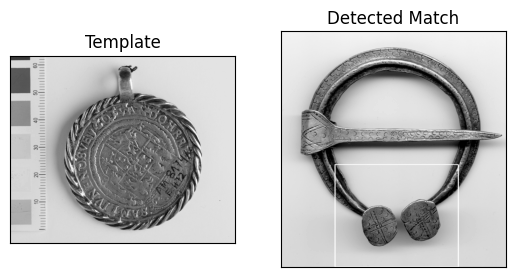

In [15]:
#Visualizing pattern matching
cv2.rectangle(img,top_left, bottom_right, 255, 2)
plt.subplot(121),plt.imshow(template, cmap = 'gray')
plt.title('Template'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img, cmap = 'gray')
plt.title('Detected Match'), plt.xticks([]), plt.yticks([])
plt.show()